In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = "results.csv"
results = pd.read_csv(results_path)

In [3]:
results_uncalib_path = "results_uncalib.csv"
results_uncalib = pd.read_csv(results_uncalib_path)

In [4]:
display(results)

,exp_name,exp_min_sample_size,exp_share_budget,exp_naive,exp_budget,exp_run_num,tau_hat,max_est,cal_hours,cal_mean_generated_samples,cal_mean_c_value,cal_miscoverage,test_miscoverage,test_mean_lpb,test_mean_covered_lpb
0,Global Budgeting,0.5,True,False,10,0,0.372453,20,0.058,9.346189,10.018302,0.099969,0.099583,16.054333,16.238501
1,Global Budgeting,0.5,True,False,25,0,0.234488,50,0.101,22.756436,24.971591,0.099926,0.103000,33.139250,33.481327
2,Global Budgeting,0.5,True,False,50,0,0.160308,100,0.169,44.190668,49.960127,0.099811,0.094750,52.465750,52.907116
3,Global Budgeting,0.5,True,False,100,0,0.142119,200,0.307,86.192578,99.624698,0.099907,0.097917,83.555833,83.880924
4,Global Budgeting,0.5,True,False,200,0,0.122064,400,0.584,168.802645,199.235117,0.099726,0.095500,125.668333,125.269762
5,Global Budgeting,0.5,True,False,300,0,0.120526,600,0.834,246.113335,292.467216,0.099759,0.098417,160.146833,159.014142
6,Global Budgeting,0.5,True,False,10,1,0.412207,20,0.059,9.363536,10.003671,0.099938,0.105250,16.240417,16.450033
7,Global Budgeting,0.5,True,False,25,1,0.221486,50,0.104,22.752564,25.036504,0.099727,0.099167,32.774667,33.070490
8,Global Budgeting,0.5,True,False,50,1,0.174077,100,0.173,44.375955,49.983105,0.099660,0.099750,53.614833,54.113765
9,Global Budgeting,0.5,True,False,100,1,0.138561,200,0.307,86.457713,99.869670,0.099983,0.096667,82.871833,83.200554


In [5]:
print(results.columns.to_list())

['exp_name', 'exp_min_sample_size', 'exp_share_budget', 'exp_naive', 'exp_budget', 'exp_run_num', 'tau_hat', 'max_est', 'cal_hours', 'cal_mean_generated_samples', 'cal_mean_c_value', 'cal_miscoverage', 'test_miscoverage', 'test_mean_lpb', 'test_mean_covered_lpb']


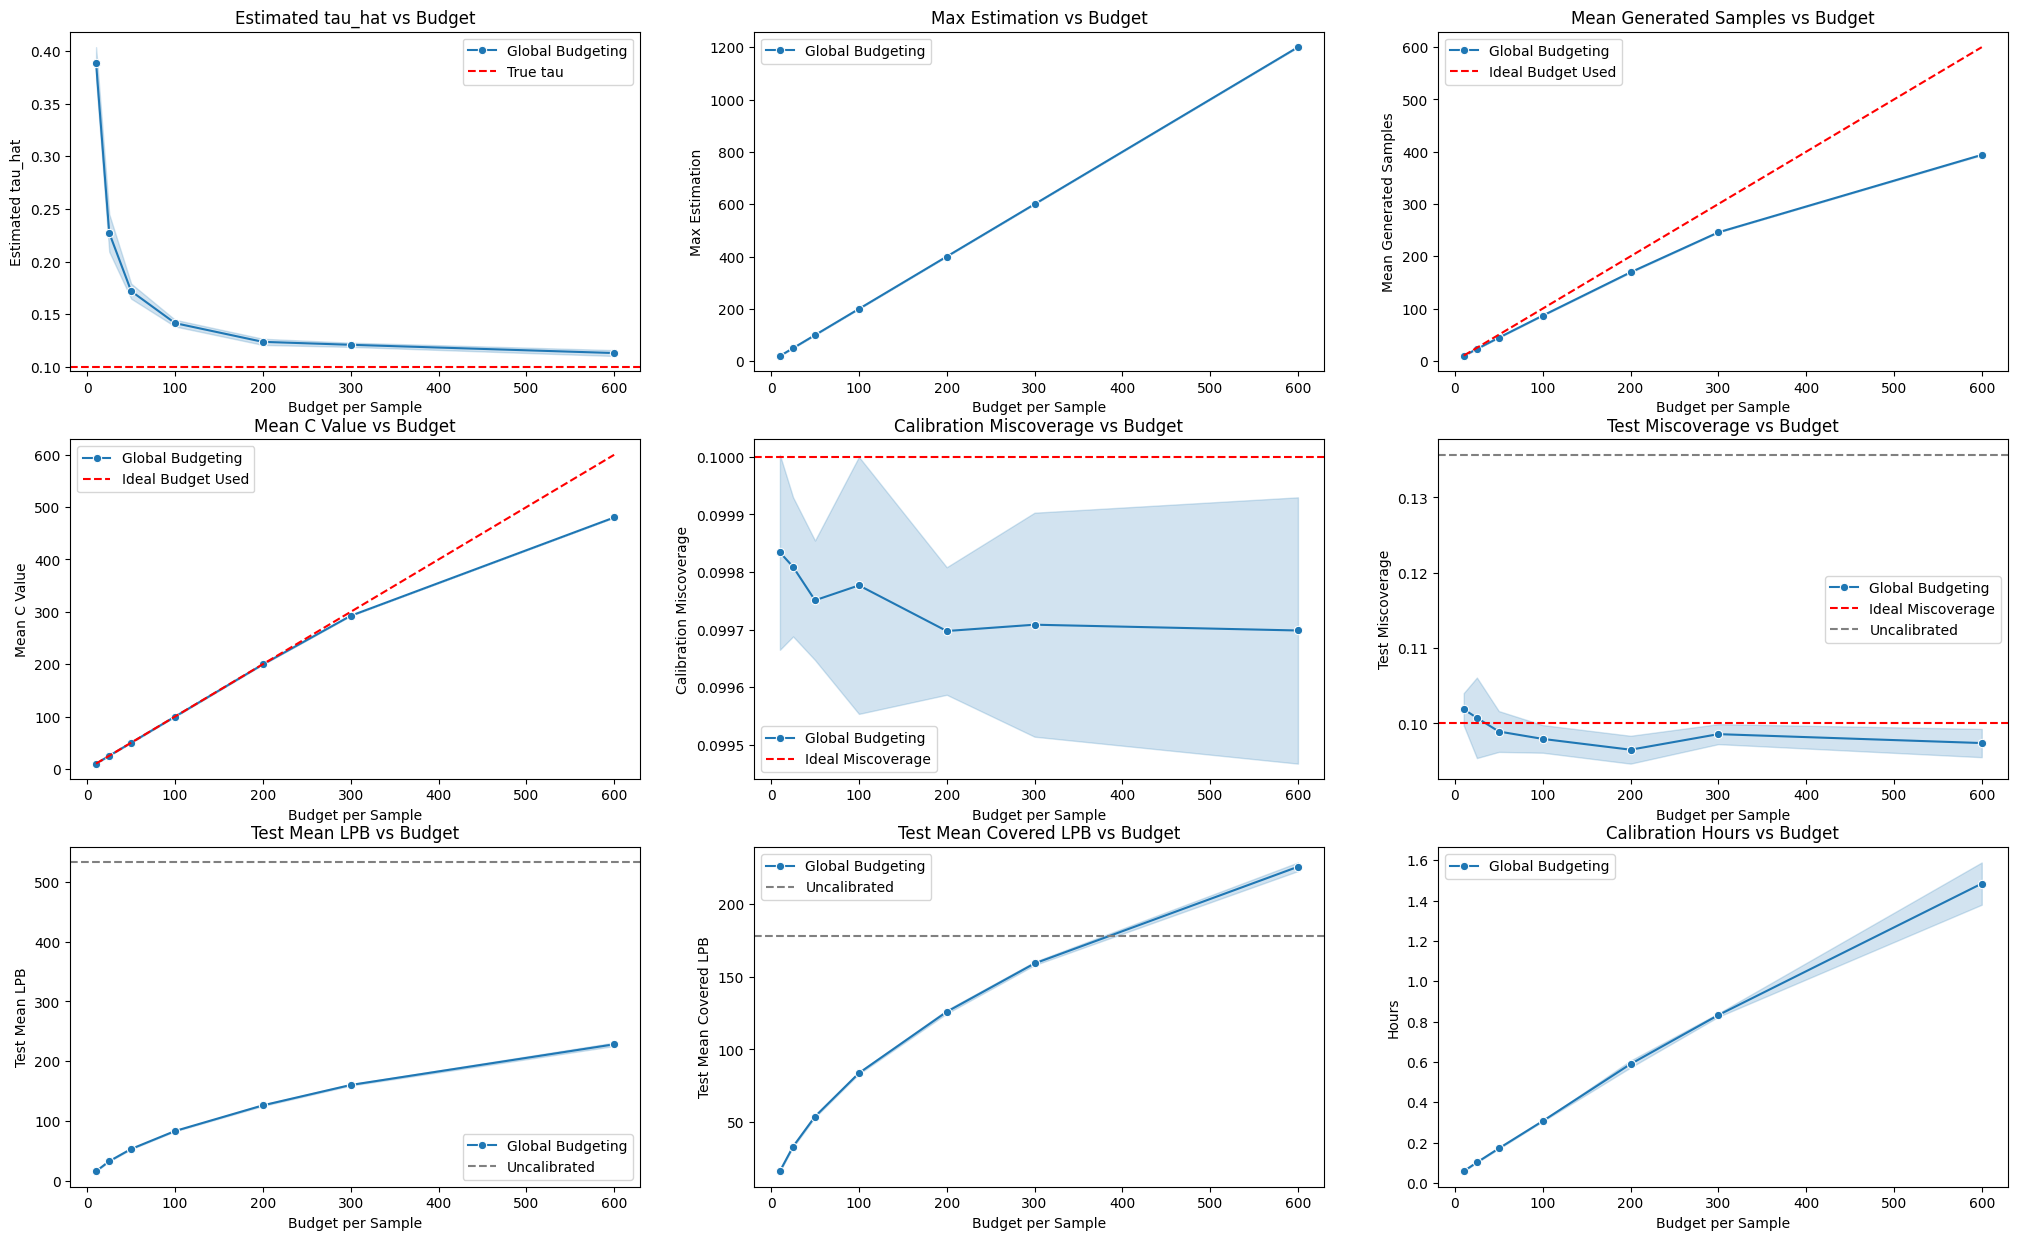

In [6]:

import seaborn as sns

# in all plots, the legend is exp_name
# the x axis in all plots is exp_budget
# for each y value create a distinct plot:
# exp_budget vs the following: 'tau_hat', 'max_est', 'cal_mean_generated_samples', 'cal_mean_c_value', 'cal_miscoverage', 'test_miscoverage', 'test_mean_lpb', `cal_hours`

# use sns.lineplot to plot the results
def plot_results(x, y, title, xlabel, ylabel, hue=None, ax = None) -> plt.Axes:
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        
    if hue is None:
        hue = 'exp_name'
    
    # Create a line plot with confidence intervals
    ax = sns.lineplot(data=results, x=x, y=y, hue=hue, ax=ax, marker="o", errorbar="sd")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax
    
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()
        
# 1. exp_budget vs tau_hat
ax = plot_results('exp_budget', 'tau_hat', 'Estimated tau_hat vs Budget', 'Budget per Sample', 'Estimated tau_hat', ax=axes[0])
ax.axhline(y=0.1, color='r', linestyle='--', label='True tau')
ax.legend()

# 2. exp_budget vs max_est
plot_results('exp_budget', 'max_est', 'Max Estimation vs Budget', 'Budget per Sample', 'Max Estimation', ax=axes[1])

# 3. exp_budget vs cal_mean_generated_samples
ax = plot_results('exp_budget', 'cal_mean_generated_samples', 'Mean Generated Samples vs Budget', 'Budget per Sample', 'Mean Generated Samples', ax=axes[2])
ax.plot(results['exp_budget'].unique(), results['exp_budget'].unique(), color='red', linestyle='--', label='Ideal Budget Used')
ax.legend()

# 4. exp_budget vs cal_mean_c_value
ax = plot_results('exp_budget', 'cal_mean_c_value', 'Mean C Value vs Budget', 'Budget per Sample', 'Mean C Value', ax=axes[3])
ax.plot(results['exp_budget'].unique(), results['exp_budget'].unique(), color='red', linestyle='--', label='Ideal Budget Used')
ax.legend()

# 5. exp_budget vs cal_miscoverage
ax = plot_results('exp_budget', 'cal_miscoverage', 'Calibration Miscoverage vs Budget', 'Budget per Sample', 'Calibration Miscoverage', ax=axes[4])
ax.axhline(y=0.1, color='r', linestyle='--', label='Ideal Miscoverage')
ax.legend()

# 6. exp_budget vs test_miscoverage
ax = plot_results('exp_budget', 'test_miscoverage', 'Test Miscoverage vs Budget', 'Budget per Sample', 'Test Miscoverage', ax=axes[5])
ax.axhline(y=0.1, color='r', linestyle='--', label='Ideal Miscoverage')
ax.axhline(y=results_uncalib['test_miscoverage'].mean(), color='gray', linestyle='--', label='Uncalibrated')
ax.legend()

# 7. exp_budget vs test_mean_lpb
ax = plot_results('exp_budget', 'test_mean_lpb', 'Test Mean LPB vs Budget', 'Budget per Sample', 'Test Mean LPB', ax=axes[6])
ax.axhline(y=results_uncalib['test_mean_lpb'].mean(), color='gray', linestyle='--', label='Uncalibrated')
ax.legend()

# 8. exp_budget vs test_mean_covered_lpb
ax = plot_results('exp_budget', 'test_mean_covered_lpb', 'Test Mean Covered LPB vs Budget', 'Budget per Sample', 'Test Mean Covered LPB', ax=axes[7])
ax.axhline(y=results_uncalib['test_mean_covered_lpb'].mean(), color='gray', linestyle='--', label='Uncalibrated')
ax.legend()

plot_results('exp_budget', 'cal_hours', 'Calibration Hours vs Budget', 'Budget per Sample', 'Hours', ax=axes[8])

plt.show()